In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [62]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

In [63]:
X_train.shape

(60000, 28, 28)

In [64]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [65]:
X_test.shape

(10000, 28, 28)

In [66]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [67]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [68]:
import matplotlib.pyplot as plt

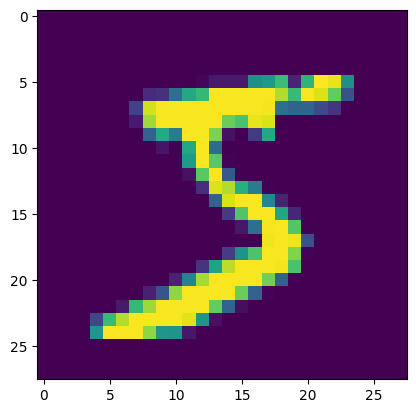

In [69]:
plt.imshow(X_train[0])

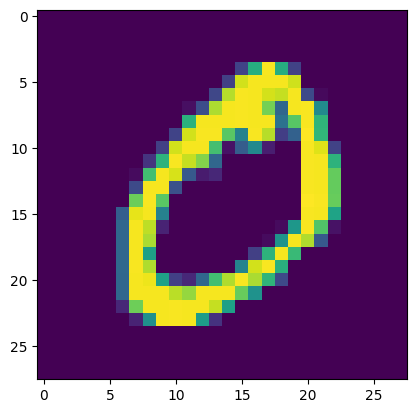

In [70]:
plt.imshow(X_train[1])

In [71]:
X_train= X_train/255
X_test= X_test/255

In [72]:
#more the value are in the similar range it converges fast and gives the result fast
#to make the program faster we divide X_test,X_train by 255 which will bring the pixel value in between 0 and 1

In [73]:
#now we start to make a neural network

In [74]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dense_6 (Dense)             (None, 32)                4128      
                                                                 
 dense_7 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
128*784+128

100480

In [77]:
10*128+10

1290

In [78]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [79]:
history=model.fit(X_train,y_train,epochs=25,validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2835 - accuracy: 0.9166 - val_loss: 0.1453 - val_accuracy: 0.9571
Epoch 2/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1192 - accuracy: 0.9639 - val_loss: 0.1186 - val_accuracy: 0.9641
Epoch 3/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0791 - accuracy: 0.9755 - val_loss: 0.1031 - val_accuracy: 0.9701
Epoch 4/25
1500/1500 [==============================] - 10s 6ms/step - loss: 0.0583 - accuracy: 0.9819 - val_loss: 0.1101 - val_accuracy: 0.9680
Epoch 5/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0462 - accuracy: 0.9848 - val_loss: 0.1053 - val_accuracy: 0.9693
Epoch 6/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0371 - accuracy: 0.9882 - val_loss: 0.0876 - val_accuracy: 0.9758
Epoch 7/25
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0291 - accuracy: 0.9904 - val_loss: 0.1049 - val_accuracy

In [80]:
y_prob=model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [81]:
y_pred=y_prob.argmax(axis=1)

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9733

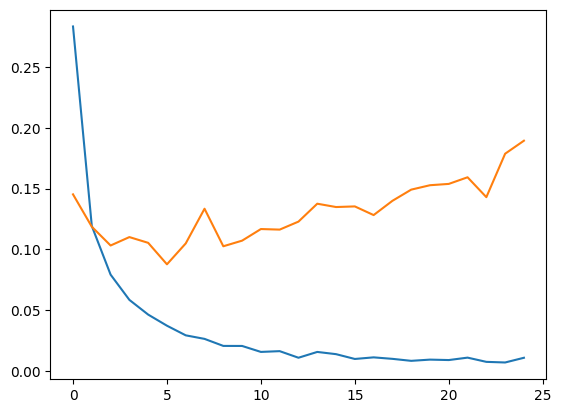

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
         

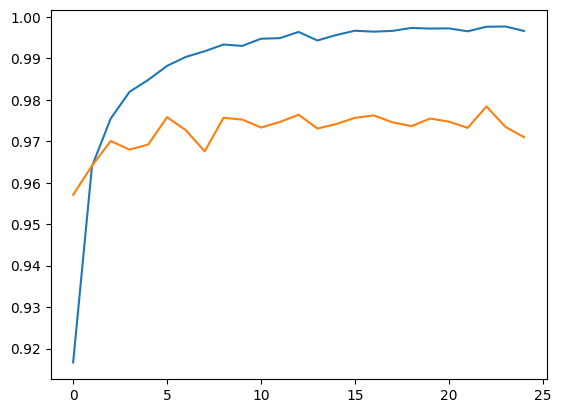

In [85]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

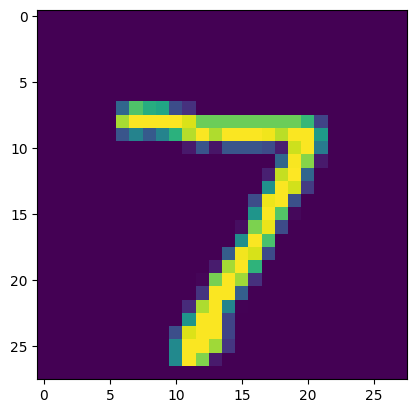

In [87]:
plt.imshow(X_test[0])

In [89]:
model.predict(X_test[0].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 48ms/step


array([7], dtype=int64)